In [60]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [61]:
def generate_dataset(n=200):
    z = np.random.binomial(1, 0.9, n)
    data = np.where(z == 1,
                 np.random.normal(5, 1, n),
                 np.random.normal(10, 1, n))
    return data

In [62]:
data = generate_dataset()
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data[:, None])

In [63]:
def gaussian_density(x, mean, variance):
    first_term = 1 / np.sqrt(2 * np.pi * np.square(variance))
    second_term = np.exp(-np.square(x - mean) / (2 * variance))
    return first_term * second_term

Text(0.5, 1.0, 'Comparison of KDE density and theoretical one')

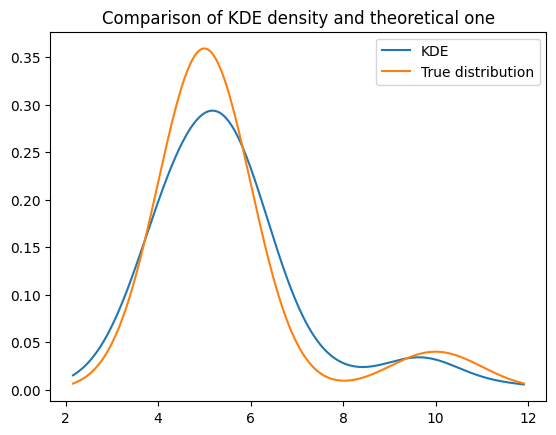

In [64]:
x_vals = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
log_dens = kde.score_samples(x_vals)

# Plot KDE
plt.plot(x_vals, np.exp(log_dens), label='KDE')
# plot theoretical distribution
plt.plot(x_vals, 0.9 * gaussian_density(x_vals, 5, 1) + 0.1 * gaussian_density(x_vals, 10, 1), label='True distribution')
plt.legend()
plt.title('Comparison of KDE density and theoretical one')

In [55]:
x = np.random.uniform(2, 12, 1000)[:, np.newaxis]
np.mean(np.square(kde.score_samples(x) - 0.9 * gaussian_density(x, 5, 1) + 0.1 * gaussian_density(x, 10, 1)))

np.float64(9.47213697516074)

Text(0.5, 1.0, 'Mean Squared Error of KDE for different sample sizes')

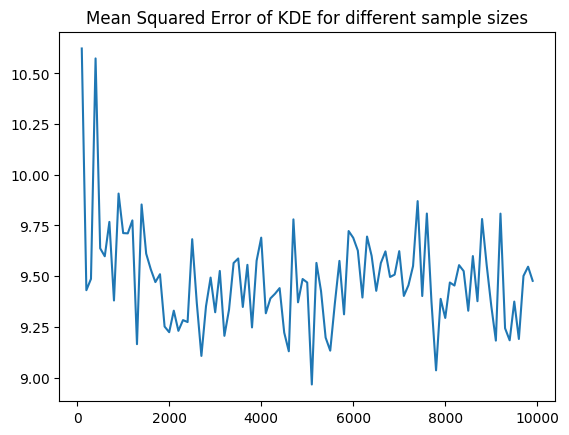

In [ ]:
mse_values = {}
for n in range(100, 10000, 100):
    data = generate_dataset(n)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data[:, None])
    x = np.random.uniform(2, 12, 1000)[:, np.newaxis]
    mse = np.mean(np.square(kde.score_samples(x) - 0.9 * gaussian_density(x, 5, 1) + 0.1 * gaussian_density(x, 10, 1)))
    mse_values[n] = mse

plt.plot(list(mse_values.keys()), list(mse_values.values()))
plt.title('Mean Squared Error of KDE for different sample sizes')

Text(0.5, 1.0, 'Comparison of different KDE kernels')

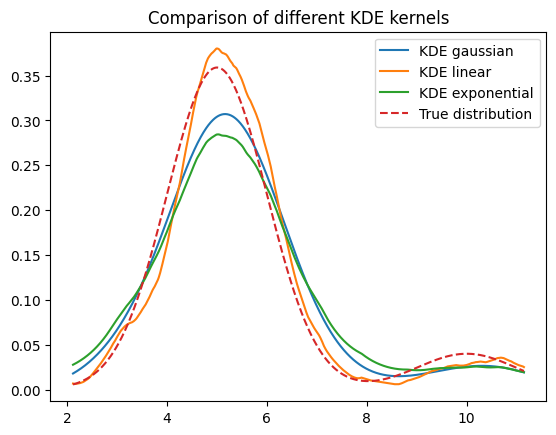

In [67]:
data = generate_dataset()
x_vals = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
kde_gaussian = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data[:, None])
kde_linear = KernelDensity(kernel='linear', bandwidth=0.75).fit(data[:, None])
kde_exponential = KernelDensity(kernel='exponential', bandwidth=0.75).fit(data[:, None])

# Plot KDEs
plt.plot(x_vals, np.exp(kde_gaussian.score_samples(x_vals)), label='KDE gaussian')
plt.plot(x_vals, np.exp(kde_linear.score_samples(x_vals)), label='KDE linear')
plt.plot(x_vals, np.exp(kde_exponential.score_samples(x_vals)), label='KDE exponential')

# plot theoretical distribution
plt.plot(x_vals, 0.9 * gaussian_density(x_vals, 5, 1) + 0.1 * gaussian_density(x_vals, 10, 1), linestyle='--', label='True distribution')
plt.legend()
plt.title('Comparison of different KDE kernels')

Text(0.5, 1.0, 'Comparison of different KDE smoothing parameters')

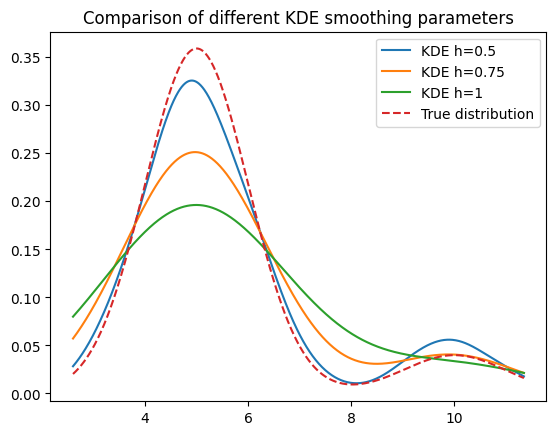

In [71]:
data = generate_dataset()
x_vals = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
kde_05 = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[:, None])
kde_075 = KernelDensity(kernel='gaussian', bandwidth=1).fit(data[:, None])
kde_1 = KernelDensity(kernel='gaussian', bandwidth=1.5).fit(data[:, None])

# Plot KDEs
plt.plot(x_vals, np.exp(kde_05.score_samples(x_vals)), label='KDE h=0.5')
plt.plot(x_vals, np.exp(kde_075.score_samples(x_vals)), label='KDE h=0.75')
plt.plot(x_vals, np.exp(kde_1.score_samples(x_vals)), label='KDE h=1')

# plot theoretical distribution
plt.plot(x_vals, 0.9 * gaussian_density(x_vals, 5, 1) + 0.1 * gaussian_density(x_vals, 10, 1), linestyle='--', label='True distribution')
plt.legend()
plt.title('Comparison of different KDE smoothing parameters')

Text(0.5, 1.0, 'Comparison of h estimation methods')

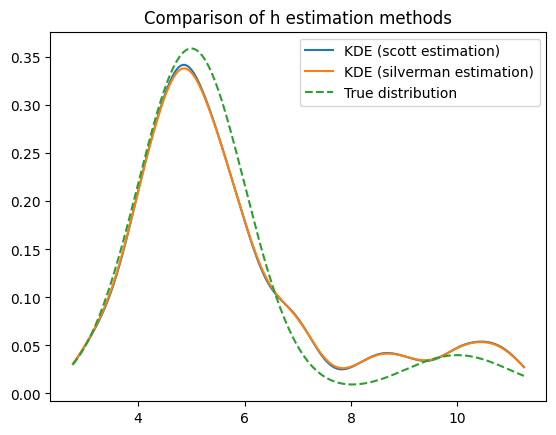

In [79]:
data = generate_dataset()
x_vals = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
kde_scott = KernelDensity(kernel='gaussian', bandwidth='scott').fit(data[:, None])
kde_silverman = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(data[:, None])

plt.plot(x_vals, np.exp(kde_scott.score_samples(x_vals)), label='KDE (scott estimation)')
plt.plot(x_vals, np.exp(kde_silverman.score_samples(x_vals)), label='KDE (silverman estimation)')
plt.plot(x_vals, 0.9 * gaussian_density(x_vals, 5, 1) + 0.1 * gaussian_density(x_vals, 10, 1), linestyle='--', label='True distribution')
plt.legend()
plt.title('Comparison of h estimation methods')